In [2]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("master.csv")  # suicides

In [4]:
#  drop un-needed columns
df = df.drop([' gdp_for_year ($) ', 'country-year'], axis=1)
# sort dataframe by country and year
df = df.sort_values(['country','year'])

print(df.shape)

(27820, 10)


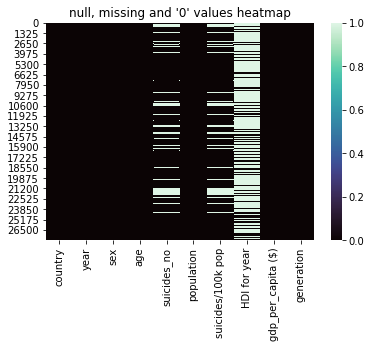


DUPLICATE VALUE COUNT:   0


In [5]:
plt.title('null, missing and \'0\' values heatmap')
sns.heatmap((df.isnull()) | (df == 0), cmap = 'mako')
plt.show()

print('\nDUPLICATE VALUE COUNT:  ', df.duplicated().sum())

In [6]:
#  percentage missing for 'suicides/100k pop' - before
for i in ['suicides_no', 'suicides/100k pop']:
    missing_before = len(df[df[i] == 0])*100/len(df)
    print(' before: {:>20} == 0:  {:>8.4f}%'.format(i,missing_before))
    
#  BEFORE - missing 'suicides_no' and 'suicides/100k pop'
sui_before = df[['suicides_no', 'suicides/100k pop']]

    
#  drop 'df['suicides/100k pop'] == 0' rows
len(df[df['suicides/100k pop'] == 0].index)
df.drop(df[df['suicides/100k pop'] == 0].index, inplace = True)

#  percentage missing for 'suicides/100k pop' - after
for i in ['suicides_no', 'suicides/100k pop']:
    missing_after = len(df[df[i] == 0])*100/len(df)
    print(' after:  {:>20} == 0:  {:>8.2f}%'.format(i,missing_after))

#  AFTER - missing 'suicides_no' and 'suicides/100k pop'
sui_after = df[['suicides_no', 'suicides/100k pop']]

 before:          suicides_no == 0:   15.3882%
 before:    suicides/100k pop == 0:   15.3882%
 after:           suicides_no == 0:      0.00%
 after:     suicides/100k pop == 0:      0.00%


<function matplotlib.pyplot.show(*args, **kw)>

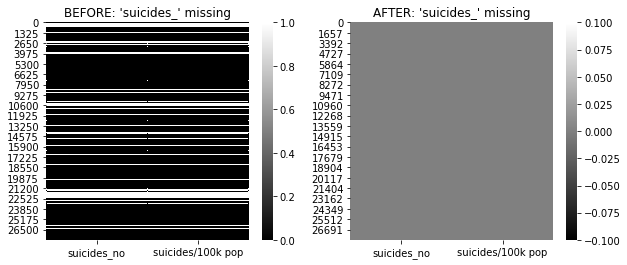

In [7]:
#  heatmaps for missing 'suicides_no' and 'suicides/100k pop'
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.heatmap((sui_before.isnull()) | (sui_before == 0), cmap = 'binary_r')
plt.title('BEFORE: \'suicides_\' missing')
plt.subplot(122)
sns.heatmap((sui_after.isnull()) | (sui_after == 0), cmap = 'binary_r')
plt.title('AFTER: \'suicides_\' missing')
plt.show

In [8]:
#  percentage missing for 'HDI for year'
print('HDI for year == NaN:  {:>8.4f}%\t(before)'.format( len(df[df['HDI for year'].isnull()])*100/len(df)))

#  before forward fill
hdi_before = df['HDI for year'].groupby(df['year']).sum()

#  fill ''HDI for year' nulls with previous values
df['HDI for year'].fillna(method='ffill', inplace=True)

#  drop remaining''HDI for year' nulls
df.drop(df[df['HDI for year'].isnull()].index, inplace = True)

#  after forward fill
hdi_after = df['HDI for year'].groupby(df['year']).sum()

#  percentage missing for 'HDI for year'
print('HDI for year == NaN:  {:>8.4f}%\t(after)'.format( len(df[df['HDI for year'].isnull()])*100/len(df)))

HDI for year == NaN:   69.3827%	(before)
HDI for year == NaN:    0.0000%	(after)


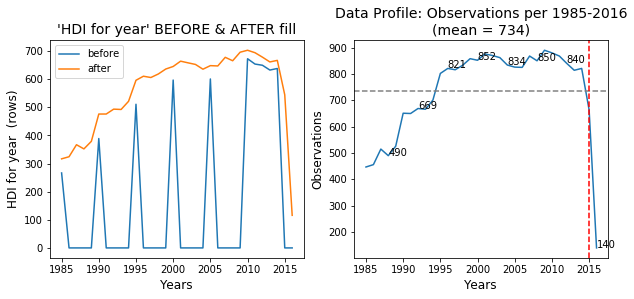

In [9]:
sr = df['year'].groupby(df['year']).value_counts()  # count rows per year
yr = df['year'].sort_values().unique()   #  years

#  plot HDI and 2016
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(yr,hdi_before)
plt.plot(yr,hdi_after)
plt.title('\'HDI for year\' BEFORE & AFTER fill', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('HDI for year  (rows)', fontsize=12)
plt.legend(['before','after'])

#  plot data profile
plt.subplot(122)
plt.plot(yr,sr)
plt.title('Data Profile: Observations per 1985-2016\n(mean = {:.0f})'.format(sr.mean()), fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.axhline(y = sr.mean(), color = 'gray', ls = '--')
plt.axvline(x = 2015, color = 'red', ls = '--')
for a,b in zip(yr, sr): 
    if a % 4 == 0:
        plt.text(a, b, str(b))
plt.show()

In [10]:
#  drop year = 2016
print('before 2016 data drop:  ',df.shape)
df.drop(df[df['year'] == 2016].index, inplace = True)
print('after  2016 data drop:  ',df.shape)

before 2016 data drop:   (23481, 10)
after  2016 data drop:   (23341, 10)


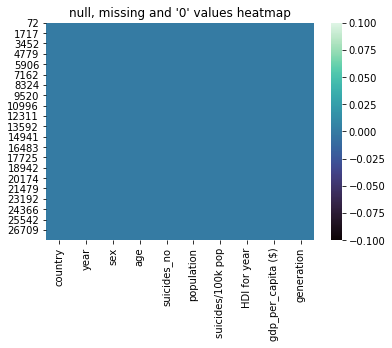


DUPLICATE COUNT:   0


In [11]:
plt.title('null, missing and \'0\' values heatmap')
sns.heatmap((df.isnull()) | (df == 0), cmap = 'mako')
plt.show()

print('\nDUPLICATE COUNT:  ', df.duplicated().sum())

In [12]:
# 1.  rearrange column name so "suicides/100k pop" is first
df_corr = df[['suicides/100k pop', 'sex', 'age', 'population', 'HDI for year', 'gdp_per_capita ($)', 'generation']]

# 2.  encode with numerical values
df_corr['sex'] = df_corr['sex'].map({'female':0,'male':1})
df_corr['age'] = df_corr['age'].map({
        '5-14 years':0,'15-24 years':1,'25-34 years':2,
        '35-54 years':3,'55-74 years':4,'75+ years':5})
df_corr['generation'] = df_corr['generation'].map({
        'Generation Z':0,'Millenials':1,'Generation X':2,
        'Boomers':3,'Silent':4,'G.I. Generation':5})

df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23341 entries, 72 to 27819
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   suicides/100k pop   23341 non-null  float64
 1   sex                 23341 non-null  int64  
 2   age                 23341 non-null  int64  
 3   population          23341 non-null  int64  
 4   HDI for year        23341 non-null  float64
 5   gdp_per_capita ($)  23341 non-null  int64  
 6   generation          23341 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.4 MB


In [13]:
from sklearn.preprocessing import MinMaxScaler

df_norm = MinMaxScaler().fit_transform(df_corr)
df_corr = pd.DataFrame(df_norm, index = df_corr.index, columns = df_corr.columns)

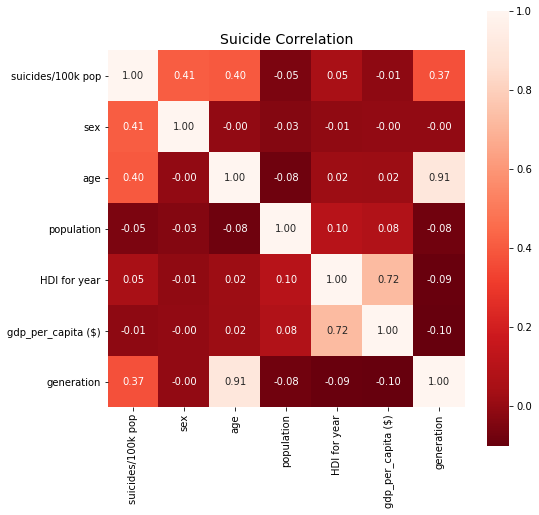

In [14]:
#  Correlations - OVERALL
dataCorr = df_corr.corr()

#  print correlation
dataCorr['suicides/100k pop'].sort_values(ascending=False)

#  plot heatmap
plt.figure(figsize=(8,8))
plt.title('Suicide Correlation', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Reds_r')

In [15]:
#  Correlation MALE - filter dataframe for male/female
df_male   = df_corr[(df_corr['sex'] == 1)]              # male
df_maleCorr = df_male.drop(["sex"], axis=1).corr()      # male corr

#  Correlation FEMALE - filter dataframe for male/female
df_female = df_corr[(df_corr['sex'] == 0)]              # female
df_femaleCorr = df_female.drop(["sex"], axis=1).corr()  # female corr

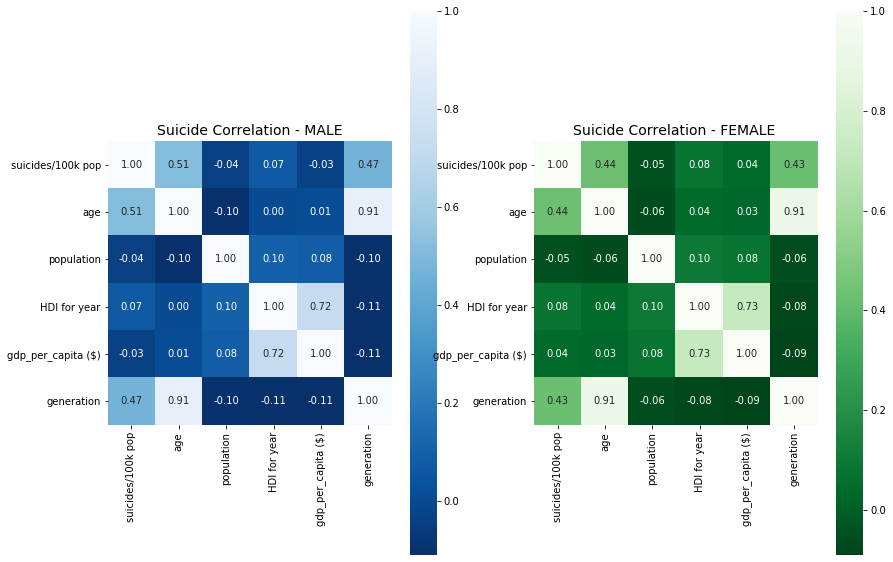

In [16]:
#  Correlation heatmaps for FEMALE/MALE
fig = plt.figure(figsize=(14,10))
fig.add_subplot(121)
plt.title('Suicide Correlation - MALE', fontsize=14)
sns.heatmap(df_maleCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')
fig.add_subplot(122)
plt.title('Suicide Correlation - FEMALE ', fontsize=14)
sns.heatmap(df_femaleCorr, annot=True, fmt='.2f', square=True, cmap = 'Greens_r')
plt.show()

In [17]:
#  Correlation - sorted for both male/female
corrM = df_maleCorr['suicides/100k pop'].sort_values(ascending=False)
corrF = df_femaleCorr['suicides/100k pop'].sort_values(ascending=False)

corrALL = pd.DataFrame(columns = ['MALE','correlation-m','FEMALE','correlation-f'])
corrALL['MALE']   = corrM.index
corrALL['correlation-m'] = corrM.values
corrALL['FEMALE'] = corrF.index
corrALL['correlation-f'] = corrF.values
print(corrALL)

                 MALE  correlation-m              FEMALE  correlation-f
0   suicides/100k pop       1.000000   suicides/100k pop       1.000000
1                 age       0.510859                 age       0.437295
2          generation       0.468135          generation       0.425663
3        HDI for year       0.065764        HDI for year       0.079029
4  gdp_per_capita ($)      -0.032025  gdp_per_capita ($)       0.040364
5          population      -0.044342          population      -0.047480
